# Take Home Exercise
## st121411
The dataset I will be using for this exercise comes from [this](https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex) url.
We will be predicting the body mass index of 0-5 using the weight, height and gender.

0. Extremely Weak
1. Weak
2. Normal
3. Overweight
4. Obesity
5. Extreme Obesity

In [1]:
#import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random

In [2]:
#Function for replacing unique keys to integers

def replaceKeys(series):
    series_dict = {}
    for i,u in enumerate(series.unique()):
        series_dict[u] = i
    return series.replace(series_dict), series_dict

In [3]:
#Functions for Multinomial Regression

def h(i, theta, X):
    #i is the index of the design matrix X
    #x is the current input
    num = np.exp(theta.T@X.iloc[i])
    den = np.sum(num)
    h_i = num/den
    #returns a (k,) array
    return h_i

def phi(k, i, theta, X):
    h_i = h(i,theta,X)
    phi_ki = h_i[k]
    #returns a scalar
    return phi_ki

def indicator(i, j):
    if i == j: return 1
    else: return 0

def grad_cost(X, y, k, theta):
    grad_k = 0
    for i in range(X.shape[0]):
        grad_k -= X.iloc[i]*(indicator(k,y.iloc[i])-phi(k,i,theta,X))/y.size
    #returns a (n,) array
    return grad_k

def batch_gradient_descent(X, y, theta, alpha, iters):
    bar_line = np.linspace(0,iters,50)
    counter = 0
    costt = np.zeros(iters)
    for itera in range(iters):
        if(bar_line[counter] <= itera+1):
            print("=",end="")
            if(bar_line[counter] == bar_line[-1]):
                print("end")
            else:
                counter += 1
        #print("iteration",itera+1,end="\t")
        costt[itera] = cost(X,y,theta)
        grad_k = np.zeros((theta.shape))
        for kk in range(0, k):
            grad_k[:,kk] = grad_cost(X,y,kk,theta)
        theta = theta - alpha * grad_k
    return theta,costt

def stochastic_gradient_descent(X, y, theta, alpha, iters):
    bar_line = np.linspace(0,iters,50)
    counter = 0
    costt = np.zeros(iters)
    for itera in range(iters):
        if(bar_line[counter] <= itera+1):
            print("=",end="")
            if(bar_line[counter] == bar_line[-1]):
                print("end")
            else:
                counter += 1
        ix = X.index
        ix = np.random.choice(ix,size=50)
        X_stochastic = X.iloc[ix]
        y_stochastic = y[ix]

        #print("iteration",itera+1,end="\t")
        costt[itera] = cost(X,y,theta)
        grad_k = np.zeros((theta.shape))
        for kk in range(0, k):
            grad_k[:,kk] = grad_cost(X_stochastic,y_stochastic,kk,theta)
        theta = theta - alpha * grad_k
    return theta,costt

def cost(X,y,theta):
    p = 0
    for i in range(X.shape[0]):
        for k in range(theta.shape[1]):
            p -= indicator(y[i], k)*np.log(phi(k,i,theta,X))/y.size
    #print(p)
    return p



In [4]:
#IMPORT DATA

data = pd.read_csv("gender_height_weight.csv") 

gender_dict = {}
data['Gender'], gender_dict = replaceKeys(data['Gender'])
print(data.columns)


Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')


In [5]:
#Split Data

X_all = (data[['Gender','Height','Weight']]).dropna().astype(float)
columns = X_all.columns

ix = np.arange(0,X_all.shape[0])
np.random.shuffle(ix)
percentage = 0.7

X_train = X_all[:int(percentage*X_all.shape[0])]
X_test = X_all[int(percentage*X_all.shape[0]):]

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_norm = (X_train-mean)/std
X_norm_test = (X_test-mean)/std
X_norm.insert(0,"Intercept",1)
X_norm_test.insert(0,"intercept",1)

print(X_norm.head())
print()
y = data['Index'].astype(float)
print(y.head())
y_test = y[int(percentage*X_all.shape[0]):]

m,n = X_norm.shape

k = y.unique().size

   Intercept    Gender    Height    Weight
0          1 -0.994302  0.228220 -0.313398
1          1 -0.994302  1.137980 -0.596102
2          1  1.005731  0.895377  0.126364
3          1  1.005731  1.501884 -0.062105
4          1 -0.994302 -1.288047 -1.412804

0    4.0
1    2.0
2    4.0
3    3.0
4    3.0
Name: Index, dtype: float64


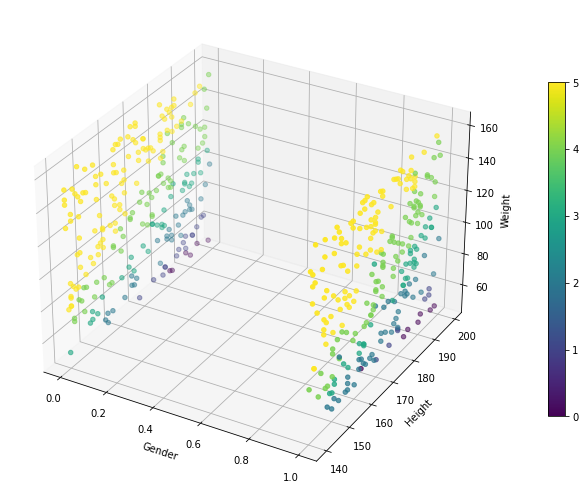

In [31]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
scatter_plot = ax.scatter(data['Gender'],data['Height'],data['Weight'],c=data['Index'])
ax.set_xlabel("Gender")
ax.set_ylabel("Height")
ax.set_zlabel('Weight')
fig.colorbar(scatter_plot,pad = 0.1,fraction=0.03)
plt.show()

In [7]:
#Learning

# theta_initial = np.array([
#     [-12.31528342,-8.42008552,-0.43873342, 5.93515649,10.14354742,5.09539845],
#     [0.33255103,-0.53111487, 0.26306291, 0.14115698, 0.12978637, -0.33544242],
#     [5.89196404,  5.55578591,  3.40426433,  0.90688353, -3.26938417,-12.48951363],
#     [-12.69688307,-10.20432245, -6.1174992 , 0.12497966, 7.82887325,21.06485181]])

theta_initial = np.zeros((n,k))

alpha = 3
iterations1 = 1000

print("stochastic gradient descent")
theta,costt = stochastic_gradient_descent(X_norm,y,theta_initial, alpha, iterations1)
print()
print(theta)

alpha = 10
iterations2 = 50

print("batch gradient descent")
theta,costt2 = batch_gradient_descent(X_norm,y, theta, alpha,  iterations2)
print()
print(theta)

stochastic gradient descent
==================================================end

[[-10.40797231  -7.44783913  -0.47862497   4.86656243   9.07775097
    4.39012301]
 [  0.3381141   -0.6113576    0.44965055   0.0556293    0.04682207
   -0.27885842]
 [  5.33240254   4.91485007   2.84561439   1.05226339  -3.02956665
  -11.11556373]
 [-10.78556341  -8.89603913  -5.76515177  -0.21081698   6.85012437
   18.80744693]]
batch gradient descent
==================================================end

[[-10.89258031  -7.69369336  -0.53120824   5.26926465   9.26935254
    4.57886472]
 [  0.33814623  -0.52751446   0.25692672   0.13509144   0.12640348
   -0.32905343]
 [  5.43699727   5.13123462   3.1553235    0.91306387  -3.04923645
  -11.5873828 ]
 [-11.4059392   -9.33332103  -5.78350585  -0.10812308   7.18815448
   19.44273468]]


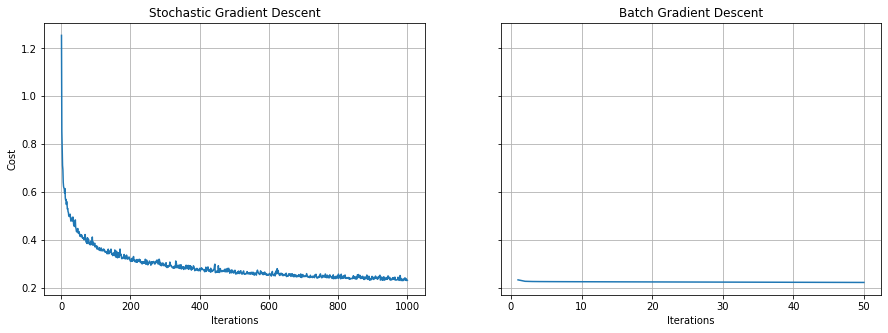

In [33]:
import matplotlib.pyplot as plt

iter_no_1 = np.linspace(1,iterations1,iterations1)
iter_no_2 = np.linspace(1,iterations2,iterations2)

fig,ax = plt.subplots(1,2,sharey=True,figsize=(15,5))

ax[0].plot(iter_no_1,costt)
ax[0].set_title("Stochastic Gradient Descent")
ax[0].set_ylabel("Cost")
ax[0].set_xlabel("Iterations")
ax[0].grid()

ax[1].plot(iter_no_2,costt2)
ax[1].set_title("Batch Gradient Descent")
ax[1].set_xlabel("Iterations")
ax[1].grid()

plt.show()

I attempted to use both stochastic gradient descent and batch gradient descent for this exercise to see and compare how each of these learning algorithmns work. As we can see from the graph, stochastic gradient descent is quite noisy compared to batch gradient descent, but since we use only 50 samples instead of the all the 300+ training samples, each iterations takes a significantly lower amount of time. Therefore I used stochastic gradient descent to quickly run 1000 iterations, I then used batch gradient descent to slowly converge to the optimum point with 50 iterations.

In [9]:
y_pred = np.argmax((X_norm_test@theta).values,axis=1)
print(y_pred)
print(y_test.values)
print(1*((y_pred==y_test).values))
print("Accuracy:",np.sum(y_pred == y_test)/float(y_test.size))

[2 2 2 5 1 3 4 5 2 5 0 4 5 4 5 5 3 4 5 4 3 5 1 2 4 5 5 5 4 3 5 1 4 5 5 2 5
 4 3 2 2 2 2 3 5 3 3 5 3 5 3 4 2 4 4 5 2 5 5 5 1 4 5 5 5 4 5 2 5 2 0 5 5 4
 2 2 5 4 4 4 2 5 5 4 2 5 5 5 1 5 4 2 5 5 4 5 4 4 5 5 5 3 5 1 2 2 4 3 4 5 4
 5 1 5 2 5 3 5 5 3 5 5 2 5 3 4 5 2 2 5 5 4 5 5 4 4 5 2 4 5 2 5 0 2 5 5 4 5
 5 5]
[2. 2. 2. 5. 0. 3. 4. 5. 1. 4. 1. 4. 5. 4. 5. 5. 3. 4. 5. 4. 3. 5. 1. 2.
 4. 5. 5. 5. 5. 3. 5. 1. 4. 5. 5. 2. 5. 4. 3. 2. 2. 2. 2. 3. 5. 3. 3. 5.
 3. 5. 3. 4. 2. 4. 4. 5. 2. 5. 5. 5. 1. 4. 5. 5. 5. 4. 5. 2. 5. 2. 1. 5.
 5. 4. 1. 1. 4. 4. 4. 4. 2. 5. 5. 4. 2. 5. 5. 5. 1. 5. 4. 2. 5. 5. 4. 5.
 4. 4. 5. 5. 5. 4. 5. 0. 2. 2. 4. 2. 4. 5. 4. 5. 1. 5. 2. 5. 3. 5. 5. 3.
 5. 5. 2. 5. 3. 4. 5. 2. 2. 5. 5. 4. 5. 4. 4. 4. 5. 2. 4. 5. 2. 5. 0. 1.
 5. 5. 4. 5. 5. 5.]
[1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 

The resulting accuracy obtained from the test set is 90% which makes it a fairly good predictor. From this exercise I learnt how to perform multinomial regression and judging by the amount of time it took to train 1050 iterations. I now understand why picking the correct learning algorithm is cruicial. Furthermore, in 1050 iterations, the model actually still didn't reach its true optimum point but we can see that the test accuracy is already very high without it reaching the true optimum point.